## TASK 1
### Dataset

The dataset selected involves the prediction of car prices. The dataset can be downloaded via the link below:
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


With the supplied independent variables, we must model the pricing of vehicles. This can be utilized by manufacturing companies to understand how prices vary in relation to the independent factors. They can then adjust the car's design, commercial strategy, and other factors to fulfill specified price targets. Furthermore, the model would assist management in comprehending the price dynamics of a new market. 

### Analytical question
Which variables are significant in predicting the price of a car and how well those variables describe the price of a car?





In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as XGB

from sklearn.metrics import r2_score, accuracy_score, mean_squared_error


In [2]:
#Reading the data
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

## Task 2 : Data Analysis
### Data Preparation

In [4]:
#Drop the car_ID column as it will not be significant in the prediction
data = data.drop('car_ID',axis= 1)

#Group together numerical and categorical variables
cat_cols = [cname for cname in data.columns if data[cname].dtype == "object"]
num_cols = [cname for cname in data.columns if data[cname].dtype in ["int64", "float64"]]

In [5]:
for column in cat_cols:
    print("{} unique:".format(column), data[column].unique())
    print("")

CarName unique: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'b

### Feature Engineering
The CarName column contains both the brand and model information of the vehicles. The following section transforms it into two separate columns.

In [6]:
data["Brand"] = data["CarName"].str.split(' ', n=1, expand=True)[0]
data["Model"] = data["CarName"].str.split(' ', n=1, expand=True)[1]

data = data.drop("CarName",axis = 1)

In [7]:
print(data["Brand"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [8]:
#Rename the wrongly written data in the brand column.

data["Brand"] = data["Brand"].replace({'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota',
                                      'vokswagen':'volkswagen', 'vw':'volkswagen'})


In [66]:
#Deal with missing values
print(data.isna().sum())

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               0
dtype: int64


In [67]:
print(data.shape)
data = data.dropna()
print(data.shape)

(203, 26)
(203, 26)


## Statistics- based Analysis


### Exporatory Data Analysis

In [11]:
# Car Brand Distribution
df =pd.DataFrame(data['Brand'].value_counts()).reset_index().rename(columns={'index':'CarName','Brand':'Count'})

fig = px.bar(df, x='CarName', y='Count',
             color='Count',
             height=500)
fig.show()

Toyota is the most popular brand, followed by nissan and mazda. The least common brands are renault and mercury

In [12]:
tmp = data.groupby('Brand').mean().round(2)
tmp.reset_index(inplace = True)
tmp1 = tmp[['Brand','price']]

fig = px.bar(tmp1,x='Brand',y='price',color = 'price')
fig.show()


The most expensive brands are jaguar, buick and Porsche while the cheapest brands are chevrolet and dodge

In [13]:
#Normalizing the numerical data
scaler = StandardScaler()
model = scaler.fit(data[num_cols])
data[num_cols] = model.transform(data[num_cols])
data[num_cols]

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.741922  -1.691128  -0.434186 -0.850551  -2.014299   -0.023231   
1     1.741922  -1.691128  -0.434186 -0.850551  -2.014299   -0.023231   
2     0.134603  -0.711886  -0.239187 -0.197236  -0.543720    0.505680   
3     0.938263   0.167772   0.199562  0.129422   0.232419   -0.429050   
4     0.938263   0.101383   0.199562  0.222752   0.232419    0.507603   
..         ...        ...        ...       ...        ...         ...   
200  -1.472716   1.711323   1.190810  1.389386   0.722612    0.753787   
201  -1.472716   1.711323   1.190810  1.342721   0.722612    0.940349   
202  -1.472716   1.711323   1.190810  1.389386   0.722612    0.869186   
203  -1.472716   1.711323   1.190810  1.389386   0.722612    1.263465   
204  -1.472716   1.711323   1.190810  1.389386   0.722612    0.965352   

     enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0      0.068447   0.530087 -1.911707         -0.289225    0.166973 -0.267799   
1      0.068447   0.530087 -1.911707         -0.289225    0.166973 -0.267799   
2      0.596398  -2.396250  0.679406         -0.289225    1.254664 -0.267799   
3     -0.435507  -0.507095  0.449813         -0.038016   -0.060683  0.779661   
4      0.212434  -0.507095  0.449813         -0.540435    0.268153  0.779661   
..          ...        ...       ...               ...         ...       ...   
200    0.332423   1.678397 -0.370159         -0.163620    0.242858  0.570169   
201    0.332423   1.678397 -0.370159         -0.364588    1.406435  0.360677   
202    1.100352   0.937552 -1.288528         -0.339467    0.748761  0.779661   
203    0.428414  -1.173856  0.449813          3.227710    0.040497 -0.686783   
204    0.332423   1.678397 -0.370159         -0.163620    0.242858  0.570169   

      citympg  highwaympg     price  
0   -0.636887   -0.537054  0.018531  
1   -0.636887   -0.537054  0.395285  
2   -0.943257   -0.682417  0.395285  
3   -0.177332   -0.100966  0.075576  
4   -1.096442   -1.263867  0.514392  
..        ...         ...       ...  
200 -0.330517   -0.391691  0.438539  
201 -0.943257   -0.827779  0.714366  
202 -1.096442   -1.118504  1.020283  
203  0.129038   -0.537054  1.143778  
204 -0.943257   -0.827779  1.163211  

[203 rows x 15 columns]

### Distribution Plots

In [14]:
# Add histogram data
x1 = data[num_cols[0]].values.tolist()
x2 = data[num_cols[1]].values.tolist()


# Group data together
hist_data = [x1, x2]

group_labels = ['symboling' ,'wheelbase']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x3 = data[num_cols[2]].values.tolist()
x4 = data[num_cols[3]].values.tolist()


# Group data together
hist_data = [x3, x4]

group_labels = ['carlength' ,'carwidth']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x5 = data[num_cols[4]].values.tolist()
x6 = data[num_cols[5]].values.tolist()


# Group data together
hist_data = [x5, x6]

group_labels = ['carheight' ,'curbweight']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x7 = data[num_cols[6]].values.tolist()
x8 = data[num_cols[7]].values.tolist()


# Group data together
hist_data = [x7, x8]

group_labels = ['enginesize','boreratio']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x9 = data[num_cols[8]].values.tolist()
x10 = data[num_cols[9]].values.tolist()


# Group data together
hist_data = [x9, x10]

group_labels = ['stroke', 'compressionratio']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x11 = data[num_cols[10]].values.tolist()
x12 = data[num_cols[11]].values.tolist()

# Group data together
hist_data = [x11, x12]

group_labels = ['horsepower' ,'peakrpm']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x13 = data[num_cols[12]].values.tolist()
x14 = data[num_cols[13]].values.tolist()

# Group data together
hist_data = [x13, x14]

group_labels = ['citympg' ,'highwaympg']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

# Add histogram data
x15 = data[num_cols[14]].values.tolist()

# Group data together
hist_data = [x15]

group_labels = ['price']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

### Distribution of categorical variables

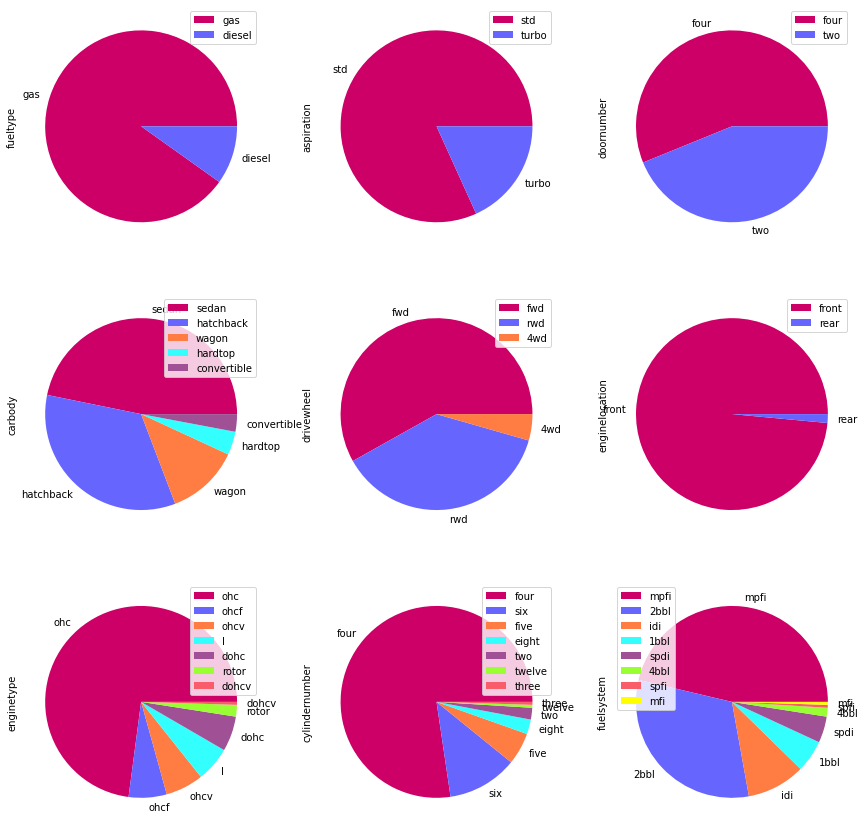

In [15]:
#Vizualizing how the categorical variables are distribted across the dataset.
f, axes = plt.subplots(3,3, figsize=(15,15))
axe = axes.ravel()
colors = ['#cc0066', '#6666ff','#ff7c43','#33ffff','#a05195','#99ff33','#f95d6a','#ffff00']
for i, col in enumerate(cat_cols[1:10]):
    df = pd.DataFrame(data[col].value_counts())
    df.plot.pie(y=col, ax=axe[i],colors=colors)
    
plt.show();


In [16]:
#Regroup the categorical column after feature engineering
cat_cols = [cname for cname in data.columns if data[cname].dtype == "object"]
print(cat_cols)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand', 'Model']


### Comparison of Price vs Categorical Variables

In [17]:
#Vizualize how the categorical variables relate to the price variable

# Initialize figure with subplots
fig = make_subplots(
    rows=5, cols=2
)

# fig = go.Figure(data=[go.Histogram(x=x)])# Add traces
fig.add_trace(go.Box(x=data[cat_cols[0]].values,y=data['price']), row=1, col=1)
fig.add_trace(go.Box(x=data[cat_cols[1]].values,y=data['price']), row=1, col=2)
fig.add_trace(go.Box(x=data[cat_cols[2]].values,y=data['price']), row=2, col=1)
fig.add_trace(go.Box(x=data[cat_cols[3]].values,y=data['price']), row=2, col=2)
fig.add_trace(go.Box(x=data[cat_cols[4]].values,y=data['price']), row=3, col=1)
fig.add_trace(go.Box(x=data[cat_cols[5]].values,y=data['price']), row=3, col=2)
fig.add_trace(go.Box(x=data[cat_cols[6]].values,y=data['price']), row=4, col=1)
fig.add_trace(go.Box(x=data[cat_cols[7]].values,y=data['price']), row=4, col=2)
fig.add_trace(go.Box(x=data[cat_cols[8]].values,y=data['price']), row=5, col=1)
fig.add_trace(go.Box(x=data[cat_cols[9]].values,y=data['price']), row=5, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Price")

# Update xaxis properties
fig.update_xaxes(title_text="Fueltype", row=1, col=1)
fig.update_xaxes(title_text="Aspiration", row=1, col=2)
fig.update_xaxes(title_text="Doornumber", row=2, col=1)
fig.update_xaxes(title_text="Carbody", row=2, col=2)
fig.update_xaxes(title_text="Drivewheel", row=3, col=1)
fig.update_xaxes(title_text="Enginelocation", row=3, col=2)
fig.update_xaxes(title_text="Enginetype", row=4, col=1)
fig.update_xaxes(title_text="Cylindernumber", row=4, col=2)
fig.update_xaxes(title_text="Fuelsystem", row=5, col=1)
fig.update_xaxes(title_text="Brand", row=5, col=2)


fig.update_layout(title_text="How Categorical Variables Compare to Price", height=3000,showlegend= False)
fig.show()


While most of the categorical variables influence the price of the car, the doornumber feature does not show much disparity in prices. This feature can be dropped as it will not be significant in the prediction of the price variable.

### Comparison of Price vs Numerical Variables

In [18]:
#Vizualize how the numerical variables relate to the price variable

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize figure with subplots
fig = make_subplots(
    rows=7, cols=2
)

# fig = go.Figure(data=[go.Histogram(x=x)])# Add traces
fig.add_trace(go.Scatter(x=data[num_cols[0]].values,y=data['price'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[1]].values,y=data['price'], mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[2]].values,y=data['price'], mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[3]].values,y=data['price'], mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[4]].values,y=data['price'], mode='markers'), row=3, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[5]].values,y=data['price'], mode='markers'), row=3, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[6]].values,y=data['price'], mode='markers'), row=4, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[7]].values,y=data['price'], mode='markers'), row=4, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[8]].values,y=data['price'], mode='markers'), row=5, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[9]].values,y=data['price'], mode='markers'), row=5, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[10]].values,y=data['price'], mode='markers'), row=6, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[11]].values,y=data['price'], mode='markers'), row=6, col=2)
fig.add_trace(go.Scatter(x=data[num_cols[12]].values,y=data['price'], mode='markers'), row=7, col=1)
fig.add_trace(go.Scatter(x=data[num_cols[13]].values,y=data['price'], mode='markers'), row=7, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Price")

# Update yaxis properties
fig.update_xaxes(title_text="Symboling", row=1, col=1)
fig.update_xaxes(title_text="Wheelbase", row=1, col=2)
fig.update_xaxes(title_text="Carlength", row=2, col=1)
fig.update_xaxes(title_text="Carwidth", row=2, col=2)
fig.update_xaxes(title_text="Carheight", row=3, col=1)
fig.update_xaxes(title_text="Curbweight", row=3, col=2)
fig.update_xaxes(title_text="Enginesize", row=4, col=1)
fig.update_xaxes(title_text="Boreratio", row=4, col=2)
fig.update_xaxes(title_text="Stroke", row=5, col=1)
fig.update_xaxes(title_text="Compressionratio", row=5, col=2)
fig.update_xaxes(title_text="Horsepower", row=6, col=1)
fig.update_xaxes(title_text="Peakrpm", row=6, col=2)
fig.update_xaxes(title_text="Citympg", row=7, col=1)
fig.update_xaxes(title_text="Highwaympg", row=7, col=2)


fig.update_layout(title_text="How Numerical Variables Compare to Price", height=3000,showlegend= False)
fig.update_traces(marker=dict(color=data['price']))
fig.show()


## Observations
The symboling variable is categorized into 5 distinct groups and can be considered a categorical varable. Most features have a linear relationship with price eg carlenght, carwidth, enginesize and horsepower which are directly proportional and citympg and hiighwaympg which are inversely proportional to price.
The other variables have a non-linear relationship.
The compression ratio variable is clustered into two groups. Further investigation reveals that it in grouped according to the fuel type.


In [65]:
fig = px.scatter(data, x = "compressionratio",  y = "price", color = data.fueltype)
fig.show()

In [20]:
#Plot of how the price variable is distributed.

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data.price.values.tolist(),
    histnorm='percent',
    marker_color='#a05195'))
fig.update_layout(
    title_text='Price Variable Distribution', 
    xaxis_title_text='Price', 
    yaxis_title_text='Count',
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()

## Feature Correlation

In [21]:
# Variable correlation
df_corr = data[num_cols].corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)

The dataset has multiple highly correlated fearures such as:
<ol>
    <li>wheelbase has high positive correlation with carlength,carwidth and curbweight</li>
    <li>carlength has high postive correlation with curbweight</li>
    <li>carlength has negative correlation with highwaympg</li>
    <li>carwidth has high postive correlation with curbweight and engine size</li>
    <li>enginesize has high positive correlation with horsepower</li>
    <li>curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg</li>
    <li>horsepower has negative correlation with citympg and highwaympg</li>
    <li>citympg and highwaympg are highly correlated</li>
</ol>
These features contribute less in predicting the output but they increase the computational cost. The following section is aimed at dropping highly correlated features to escape curse of dimensionality. 

In [22]:
threshold = 0.90
correlated_features = set()

for i in range(len(df_corr .columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > threshold:
            colname = df_corr.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'highwaympg'}


In [23]:
data.drop('highwaympg',axis=1)

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     1.741922      gas        std        two  convertible        rwd   
1     1.741922      gas        std        two  convertible        rwd   
2     0.134603      gas        std        two    hatchback        rwd   
3     0.938263      gas        std       four        sedan        fwd   
4     0.938263      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200  -1.472716      gas        std       four        sedan        rwd   
201  -1.472716      gas      turbo       four        sedan        rwd   
202  -1.472716      gas        std       four        sedan        rwd   
203  -1.472716   diesel      turbo       four        sedan        rwd   
204  -1.472716      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0            front  -1.691128  -0.434186 -0.850551  ...        mpfi   
1            front  -1.691128  -0.434186 -0.850551  ...        mpfi   
2            front  -0.711886  -0.239187 -0.197236  ...        mpfi   
3            front   0.167772   0.199562  0.129422  ...        mpfi   
4            front   0.101383   0.199562  0.222752  ...        mpfi   
..             ...        ...        ...       ...  ...         ...   
200          front   1.711323   1.190810  1.389386  ...        mpfi   
201          front   1.711323   1.190810  1.342721  ...        mpfi   
202          front   1.711323   1.190810  1.389386  ...        mpfi   
203          front   1.711323   1.190810  1.389386  ...         idi   
204          front   1.711323   1.190810  1.389386  ...        mpfi   

     boreratio    stroke compressionratio  horsepower   peakrpm   citympg  \
0     0.530087 -1.911707        -0.289225    0.166973 -0.267799 -0.636887   
1     0.530087 -1.911707        -0.289225    0.166973 -0.267799 -0.636887   
2    -2.396250  0.679406        -0.289225    1.254664 -0.267799 -0.943257   
3    -0.507095  0.449813        -0.038016   -0.060683  0.779661 -0.177332   
4    -0.507095  0.449813        -0.540435    0.268153  0.779661 -1.096442   
..         ...       ...              ...         ...       ...       ...   
200   1.678397 -0.370159        -0.163620    0.242858  0.570169 -0.330517   
201   1.678397 -0.370159        -0.364588    1.406435  0.360677 -0.943257   
202   0.937552 -1.288528        -0.339467    0.748761  0.779661 -1.096442   
203  -1.173856  0.449813         3.227710    0.040497 -0.686783  0.129038   
204   1.678397 -0.370159        -0.163620    0.242858  0.570169 -0.943257   

        price        Brand         Model  
0    0.018531  alfa-romero        giulia  
1    0.395285  alfa-romero       stelvio  
2    0.395285  alfa-romero  Quadrifoglio  
3    0.075576         audi        100 ls  
4    0.514392         audi         100ls  
..        ...          ...           ...  
200  0.438539        volvo     145e (sw)  
201  0.714366        volvo         144ea  
202  1.020283        volvo         244dl  
203  1.143778        volvo           246  
204  1.163211        volvo         264gl  

[203 rows x 25 columns]

## Categorical Feature Encoding

In [24]:
data[cat_cols]

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem        Brand         Model  
0         dohc           four       mpfi  alfa-romero        giulia  
1         dohc           four       mpfi  alfa-romero       stelvio  
2         ohcv            six       mpfi  alfa-romero  Quadrifoglio  
3          ohc           four       mpfi         audi        100 ls  
4          ohc           five       mpfi         audi         100ls  
..         ...            ...        ...          ...           ...  
200        ohc           four       mpfi        volvo     145e (sw)  
201        ohc           four       mpfi        volvo         144ea  
202       ohcv            six       mpfi        volvo         244dl  
203        ohc            six        idi        volvo           246  
204        ohc           four       mpfi        volvo         264gl  

[203 rows x 11 columns]

In [25]:
one_hot_encoder = OneHotEncoder(sparse=False)

#We will not include the Model variable so as to reduce the number of dimensions
#Also, based on the exploratory data analysis, the doornumber variable needs to be dropped.
cat_cols.remove('doornumber')
cat_cols.remove('Model')

encoded_cols = one_hot_encoder.fit(data[cat_cols])
encoded_cols = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_cols]))

one_hot_encoder.get_feature_names()
encoded_cols.columns = one_hot_encoder.get_feature_names(cat_cols)

## Prepare final dataset

In [26]:
#Combine numerical columns and categorical columns
data[num_cols].index = encoded_cols.index

final_df = pd.concat([data[num_cols].reset_index(drop=True),
                encoded_cols.reset_index(drop=True)], axis=1)
final_df

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.741922  -1.691128  -0.434186 -0.850551  -2.014299   -0.023231   
1     1.741922  -1.691128  -0.434186 -0.850551  -2.014299   -0.023231   
2     0.134603  -0.711886  -0.239187 -0.197236  -0.543720    0.505680   
3     0.938263   0.167772   0.199562  0.129422   0.232419   -0.429050   
4     0.938263   0.101383   0.199562  0.222752   0.232419    0.507603   
..         ...        ...        ...       ...        ...         ...   
198  -1.472716   1.711323   1.190810  1.389386   0.722612    0.753787   
199  -1.472716   1.711323   1.190810  1.342721   0.722612    0.940349   
200  -1.472716   1.711323   1.190810  1.389386   0.722612    0.869186   
201  -1.472716   1.711323   1.190810  1.389386   0.722612    1.263465   
202  -1.472716   1.711323   1.190810  1.389386   0.722612    0.965352   

     enginesize  boreratio    stroke  compressionratio  ...  Brand_nissan  \
0      0.068447   0.530087 -1.911707         -0.289225  ...           0.0   
1      0.068447   0.530087 -1.911707         -0.289225  ...           0.0   
2      0.596398  -2.396250  0.679406         -0.289225  ...           0.0   
3     -0.435507  -0.507095  0.449813         -0.038016  ...           0.0   
4      0.212434  -0.507095  0.449813         -0.540435  ...           0.0   
..          ...        ...       ...               ...  ...           ...   
198    0.332423   1.678397 -0.370159         -0.163620  ...           0.0   
199    0.332423   1.678397 -0.370159         -0.364588  ...           0.0   
200    1.100352   0.937552 -1.288528         -0.339467  ...           0.0   
201    0.428414  -1.173856  0.449813          3.227710  ...           0.0   
202    0.332423   1.678397 -0.370159         -0.163620  ...           0.0   

     Brand_peugeot  Brand_plymouth  Brand_porsche  Brand_renault  Brand_saab  \
0              0.0             0.0            0.0            0.0         0.0   
1              0.0             0.0            0.0            0.0         0.0   
2              0.0             0.0            0.0            0.0         0.0   
3              0.0             0.0            0.0            0.0         0.0   
4              0.0             0.0            0.0            0.0         0.0   
..             ...             ...            ...            ...         ...   
198            0.0             0.0            0.0            0.0         0.0   
199            0.0             0.0            0.0            0.0         0.0   
200            0.0             0.0            0.0            0.0         0.0   
201            0.0             0.0            0.0            0.0         0.0   
202            0.0             0.0            0.0            0.0         0.0   

     Brand_subaru  Brand_toyota  Brand_volkswagen  Brand_volvo  
0             0.0           0.0               0.0          0.0  
1             0.0           0.0               0.0          0.0  
2             0.0           0.0               0.0          0.0  
3             0.0           0.0               0.0          0.0  
4             0.0           0.0               0.0          0.0  
..            ...           ...               ...          ...  
198           0.0           0.0               0.0          1.0  
199           0.0           0.0               0.0          1.0  
200           0.0           0.0               0.0          1.0  
201           0.0           0.0               0.0          1.0  
202           0.0           0.0               0.0          1.0  

[203 rows x 73 columns]

## Recusive Feature Elimination
The dataset contains a large number of features. It is necessary to reduce the number of features to escape the curse of dimensionality. If we have more features than observations, there is risk that the model will be highly overfit. Too many features also make it harder to cluster the observations. Recursive feature elimination makes it possible to select only the optimal features and hence increase model performnce.

In [27]:
#Reduce number of features to minimze dimentionality.
X = final_df[num_cols].drop("price", axis=1)
y = final_df["price"]

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data
pipeline.fit(X, y)

features = list(X.columns[rfe.support_])
print(features)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'highwaympg']


In [28]:
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected False, Rank: 3.000
Column: 13, Selected True, Rank: 1.000


In [38]:
#Create the final dataset with only the selected features

result = set(num_cols).difference(set(features))
final_cols = set(final_df.columns.tolist()).difference(set(result))
final_cols = list(final_cols)

X = final_df[final_cols]
y = final_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=0)


## Modelling
Finally, the data is presented to a machine learning model for training. The models to be applied are the Linear Regression, the Random Forest and the XG Boost model. Their performances are going to be selected and the best peforming model selected. Evaluation is going to be done based on the Mean Squared Error and r2_Score.

## Linear Regression

In [57]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

predictions = reg_model.predict(X_test)

reg_r2_score = r2_score(y_test, predictions)
mse_reg = np.sqrt(mean_squared_error(y_test, predictions))

print("R2 Score: {:.5f}".format(reg_r2_score))
print("MSE: {:.5f}".format(mse_reg))

R2 Score: 0.87870
MSE: 0.40447


## Random Forest

In [58]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

rf_r2_score = r2_score(y_test, predictions)
mse_rf = np.sqrt(mean_squared_error(y_test, predictions))

print("R2 Score: {:.5f}".format(rf_r2_score))
print("MSE: {:.5f}".format(mse_rf))

R2 Score: 0.89413
MSE: 0.37787


## XG Boost

In [59]:
xgb_model = XGB.XGBRegressor(gamma=0.05, learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2200,
                             reg_alpha=0.4, reg_lambda=0.8,
                             subsample=0.5, random_state =7)
 
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

xgb_r2_score = r2_score(y_test, predictions)
mse_xgb = np.sqrt(mean_squared_error(y_test, predictions))

print("R2 Score: {:.5f}".format(xgb_r2_score))
print("MSE: {:.5f}".format(mse_xgb))

R2 Score: 0.90668
MSE: 0.35476


In [62]:
# Model Comparison
models = [ ('Linear Regression ',reg_r2_score, mse_reg),  
          ('Random Forest ', rf_r2_score, mse_rf),
          ('XGBoost', xgb_r2_score, mse_xgb)
         ]

In [63]:
df = pd.DataFrame(data = models, columns=['Model', 'R2 Score', 'MPE'])
df

Model  R2 Score       MPE
0  Linear Regression   0.878698  0.404471
1      Random Forest   0.894131  0.377866
2             XGBoost  0.906681  0.354763

In [64]:
df.sort_values(by=['MPE'], ascending=False, inplace=True)


fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Model'].values.tolist(),
    y=df['R2 Score'].values.tolist(),
    name=' R2 Score'
))
fig.add_trace(go.Bar(
    x=df['Model'].values.tolist(),
    y=df['MPE'].values.tolist(),
    name=' MPE'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

## Conclusion
The best performing model is the Extreme Gradient Boosting (XGB) model. It has the highest r2 score and the lowest mean percentage eror. The XGB model performs well because it is an ensemble model that combines the estimates from a set of simpler and weaker models. 